In [45]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data into python enviroment
df=pd.read_csv("BL-Flickr-Images-Book.csv")

# Data Inspection

In [3]:
df.head(3)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.


In [4]:
df.tail(3)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8286,4160339,NaN,London,1834-43,NaN,Collectanea Topographica et Genealogica. [Firs...,NaN,"BANDINEL, Bulkeley.|Nichols, John Gough",NaN,NaN,NaN,NaN,continuing,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 79...


In [5]:
# Shape of the data
df.shape

(8287, 15)

In [6]:
# Dtype of the data
df.dtypes

Identifier                  int64
Edition Statement          object
Place of Publication       object
Date of Publication        object
Publisher                  object
Title                      object
Author                     object
Contributors               object
Corporate Author          float64
Corporate Contributors    float64
Former owner               object
Engraver                  float64
Issuance type              object
Flickr URL                 object
Shelfmarks                 object
dtype: object

In [7]:
# Columns in the dataset
df.columns

Index(['Identifier', 'Edition Statement', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author', 'Contributors',
       'Corporate Author', 'Corporate Contributors', 'Former owner',
       'Engraver', 'Issuance type', 'Flickr URL', 'Shelfmarks'],
      dtype='object')

In [8]:
# null value count in the dataset
df.isna().sum()

Identifier                   0
Edition Statement         7514
Place of Publication         0
Date of Publication        181
Publisher                 4195
Title                        0
Author                    1778
Contributors                 0
Corporate Author          8287
Corporate Contributors    8287
Former owner              8286
Engraver                  8287
Issuance type                0
Flickr URL                   0
Shelfmarks                   0
dtype: int64

In [9]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [10]:
# describing the data
#df.describe()
# all are kind of objecttype

# Data Cleaning

In [11]:
# Replacing space in the column names

cols=df.columns

for i in cols:
    j=i.replace(" ","_")
    df.rename(columns={i:j},inplace=True)
     

In [12]:
df.columns

Index(['Identifier', 'Edition_Statement', 'Place_of_Publication',
       'Date_of_Publication', 'Publisher', 'Title', 'Author', 'Contributors',
       'Corporate_Author', 'Corporate_Contributors', 'Former_owner',
       'Engraver', 'Issuance_type', 'Flickr_URL', 'Shelfmarks'],
      dtype='object')

In [13]:
# Null Value Handling
# since columns Corporate Author,Corporate Contributors,Former owner & Engraver contain no values, We can drop out these columns

df.drop(columns=["Corporate_Author","Corporate_Contributors","Former_owner","Engraver"],axis=1,inplace=True)

In [14]:
df.head(3)

,Identifier,Edition_Statement,Place_of_Publication,Date_of_Publication,Publisher,Title,Author,Contributors,Issuance_type,Flickr_URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.


In [15]:
# Checking the identifier is unique no or not
df["Identifier"].is_unique
df1=df.copy()

In [16]:
# Identifier is a unique no, So We can set the index to identifier value
df.set_index("Identifier",inplace=True)

In [17]:
df.head(3)

,Edition_Statement,Place_of_Publication,Date_of_Publication,Publisher,Title,Author,Contributors,Issuance_type,Flickr_URL,Shelfmarks
Identifier,,,,,,,,,,
206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.


In [18]:
# We can drop irrelevant columns from dataset

cols=["Edition_Statement","Contributors","Issuance_type","Shelfmarks"]
df.drop(columns=cols,axis=1,inplace=True)


In [19]:
df.head(3)

,Place_of_Publication,Date_of_Publication,Publisher,Title,Author,Flickr_URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...


In [20]:
# Checking the unique values of each column
df.nunique()

Place_of_Publication    1441
Date_of_Publication     1148
Publisher               1989
Title                   8210
Author                  5005
Flickr_URL              8287
dtype: int64

In [21]:
# Dealing with column Place_of_Publication
df["Place_of_Publication"]

Identifier
206                          London
216        London; Virtue & Yorston
218                          London
472                          London
480                          London
                     ...           
4158088                      London
4158128                       Derby
4159563                      London
4159587         Newcastle upon Tyne
4160339                      London
Name: Place_of_Publication, Length: 8287, dtype: object

In [22]:
#Replacing The values contain LOndon, Oxford using np.where

plc=df["Place_of_Publication"]
london=df["Place_of_Publication"].str.contains("London")
oxford=df["Place_of_Publication"].str.contains("Oxford")

df["Place_of_Publication"]=np.where(london,'London',np.where(oxford, 'Oxford',plc.str.replace('-', ' ')))


In [23]:
df["Place_of_Publication"].value_counts()

London                   4219
Paris                     479
Edinburgh                 208
New York                  193
Leipzig                   119
                         ... 
Cadell & Davies, etc        1
Suttaby, Evance, & Co       1
Charles Griffin & Co        1
Ermanno Loescher            1
Moskwa                      1
Name: Place_of_Publication, Length: 1186, dtype: int64

In [25]:
df.head(3)

,Place_of_Publication,Date_of_Publication,Publisher,Title,Author,Flickr_URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...


In [26]:
# Dealing with column Date_of_Publication
df["Date_of_Publication"].value_counts()

1897          157
1896          150
1893          130
1892          127
1898          125
             ... 
[1895-97.]      1
1838-39         1
1854-55         1
[1882, 85]      1
1834-43         1
Name: Date_of_Publication, Length: 1148, dtype: int64

<b>regular expression</b></br>

df3=df["Date_of_Publication"].str.extract(r'^(\d{4})', expand=False)</br>

regex = r'^(\d{4})'</br>

The regular expression above is meant to find any four digits at the beginning of a string, which suffices for our case. The
above is a raw string (meaning that a backslash is no longer an escape character), which is standard practice with
regular expressions.
The \d represents any digit, and {4} repeats this rule four times. The ^ character matches the start of a string, and the
parentheses denote a capturing group, which signals to Pandas that we want to extract that part of the regex. (We want
^ to avoid cases where [ starts off the string.)

In [27]:
# WE extract first group of no's from the data set

#Remove the extra dates in square brackets, wherever present: 1879 [1878]
#Convert date ranges to their “start date”, wherever present: 1860-63; 1839, 38-54
#Completely remove the dates we are not certain about and replace them with NumPy’s NaN: [1897?]
#Convert the string nan to NumPy’s NaN value

In [28]:
extr = df['Date_of_Publication'].str.extract(r'^(\d{4})', expand=False)

In [29]:
# Converting to numeric value to avoid Nan 
df["Date_of_Publication"]=pd.to_numeric(extr)

In [30]:
 df['Date_of_Publication'].isnull().sum() / len(df)


0.11717147339205986

In [32]:
df.head(3)

,Place_of_Publication,Date_of_Publication,Publisher,Title,Author,Flickr_URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...


In [35]:
# Total Null Values in the data set 
df.isnull().sum()

Place_of_Publication       0
Date_of_Publication      971
Publisher               4195
Title                      0
Author                  1778
Flickr_URL                 0
dtype: int64

Text(0.5, 0, 'Column Names')

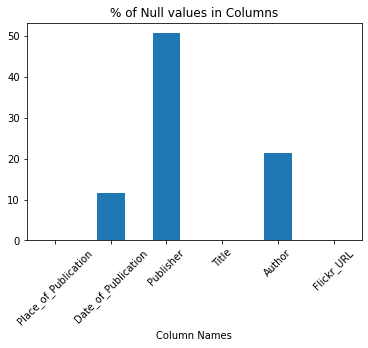

In [50]:
# Null value % for each column
(df.isnull().sum()/len(df)*100).plot(kind='bar')

plt.xticks(rotation=45)
plt.title("% of Null values in Columns") 
plt.xlabel("Column Names")